In [5]:
import numpy as np

import pandas as pd 

from numpy import unique, argmax

from tensorflow.keras.datasets.mnist import load_data 

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import Dense 

from tensorflow.keras.layers import Flatten 

from tensorflow.keras.layers import Dropout 

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist 

In [6]:
#loading the MNIST Dataset 

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [7]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
#reshaping train and test sets 

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))

test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [9]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [10]:
#normalizing the pixel values of images 

train_x = train_x.astype('float32')/255.0

test_x = test_x.astype('float32')/255.0

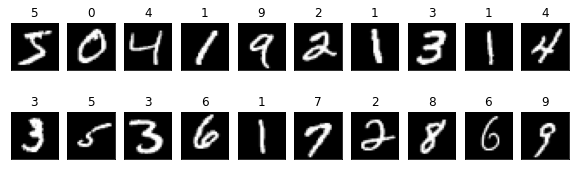

In [11]:
#plotting images of dataset 

fig = plt.figure(figsize = (10,3))

for i in range(20):

    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(train_x[i]), cmap='gray')

    ax.set_title(train_y[i])

In [12]:
shape = train_x.shape[1:]

shape

(28, 28, 1)

In [17]:
#CNN Model
from tensorflow.keras.layers import MaxPool2D

model = Sequential()

#adding convolutional layer 

model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(48, (3,3), activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [23]:
#compiling model 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

x=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 51s - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0271 - val_accuracy: 0.9938 - 51s/epoch - 121ms/step
Epoch 2/10
422/422 - 47s - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.0242 - val_accuracy: 0.9953 - 47s/epoch - 112ms/step
Epoch 3/10
422/422 - 47s - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0292 - val_accuracy: 0.9925 - 47s/epoch - 112ms/step
Epoch 4/10
422/422 - 49s - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0280 - val_accuracy: 0.9937 - 49s/epoch - 117ms/step
Epoch 5/10
422/422 - 58s - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0257 - val_accuracy: 0.9950 - 58s/epoch - 137ms/step
Epoch 6/10
422/422 - 60s - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0237 - val_accuracy: 0.9953 - 60s/epoch - 141ms/step
Epoch 7/10
422/422 - 57s - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0274 - val_accuracy: 0.9945 - 57s/epoch - 136ms/step
Epoch 8/10
422/422 - 55s - loss: 0.0099 - accuracy: 0.9964 - val_loss: 0.0297 - val_accuracy: 0.9933 - 55s/epoch - 131

In [22]:
loss, accuracy= model.evaluate(test_x, test_y, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 99.30999875068665
